In [25]:
import pandas as pd
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.pyplot as plt
import scipy.stats as stats


In [26]:
df1 = pd.read_csv('/content/airlines_group1.csv')
df1

,date,airline,origin,destination,sched_dep_time,actual_dep_time,dep_delay,dep_delay_min,taxi_out,taxi_in,...,actual_duration,air_time,dist,dist_group,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,week
0,2020-10-15,United Airlines,"Charlotte, NC","Washington, DC",Afternoon,1444.0,-1.0,0.0,53.0,8.0,...,116.0,55.0,322.0,2,0.0,0.0,19.0,0.0,0.0,42
1,2020-10-23,United Airlines,"Pittsburgh, PA","Houston, TX",Afternoon,1611.0,-4.0,0.0,8.0,8.0,...,213.0,197.0,1117.0,5,0.0,0.0,16.0,0.0,0.0,43
2,2020-10-20,United Airlines,"Louisville, KY","Houston, TX",Morning,700.0,0.0,0.0,29.0,5.0,...,182.0,148.0,788.0,4,0.0,0.0,32.0,0.0,0.0,43
3,2020-10-20,United Airlines,"Little Rock, AR","Houston, TX",Morning,709.0,-1.0,0.0,59.0,8.0,...,129.0,62.0,374.0,2,0.0,0.0,29.0,0.0,0.0,43
4,2020-10-17,United Airlines,"Washington, DC","Sarasota/Bradenton, FL",Morning,1153.0,83.0,83.0,10.0,2.0,...,136.0,124.0,849.0,4,0.0,0.0,70.0,0.0,0.0,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7711481,2023-04-26,United Airlines,"Houston, TX","San Francisco, CA",Afternoon,1230.0,-4.0,0.0,19.0,5.0,...,241.0,217.0,1635.0,7,0.0,0.0,0.0,0.0,0.0,17
7711482,2023-04-26,United Airlines,"Chicago, IL","Philadelphia, PA",Morning,1100.0,-4.0,0.0,18.0,8.0,...,108.0,82.0,678.0,3,0.0,0.0,0.0,0.0,0.0,17
7711483,2023-04-26,United Airlines,"Las Vegas, NV","Chicago, IL",Afternoon,1247.0,-2.0,0.0,17.0,16.0,...,217.0,184.0,1514.0,7,0.0,0.0,0.0,0.0,0.0,17
7711484,2023-04-26,United Airlines,"Miami, FL","Newark, NJ",Morning,739.0,-12.0,0.0,14.0,20.0,...,178.0,144.0,1085.0,5,0.0,0.0,0.0,0.0,0.0,17


- `df1` includes airline data for the five carriers:  
  - United Airlines  
  - American Airlines  
  - Hawaiian Airlines  
  - JetBlue Airways  
  - Frontier Airlines  

In [27]:
df2 = pd.read_csv('/content/airlines_group2.csv')
df2

,date,airline,origin,destination,sched_dep_time,actual_dep_time,dep_delay,dep_delay_min,taxi_out,taxi_in,...,actual_duration,air_time,dist,dist_group,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,week
0,2020-10-01,Delta Air Lines,"Atlanta, GA","New York, NY",Afternoon,1215.0,0.0,0.0,21.0,7.0,...,123.0,95.0,760.0,4,0.0,0.0,0.0,0.0,0.0,40
1,2020-10-01,Delta Air Lines,"New York, NY","Atlanta, GA",Afternoon,1620.0,80.0,80.0,14.0,7.0,...,132.0,111.0,760.0,4,62.0,0.0,0.0,0.0,0.0,40
2,2020-10-01,Delta Air Lines,"New York, NY","San Francisco, CA",Afternoon,1757.0,-3.0,0.0,13.0,3.0,...,348.0,332.0,2586.0,11,0.0,0.0,0.0,0.0,0.0,40
3,2020-10-01,Delta Air Lines,"San Francisco, CA","New York, NY",Night,2300.0,0.0,0.0,10.0,6.0,...,317.0,301.0,2586.0,11,0.0,0.0,0.0,0.0,0.0,40
4,2020-10-01,Delta Air Lines,"New York, NY","San Francisco, CA",Morning,758.0,-2.0,0.0,21.0,3.0,...,362.0,338.0,2586.0,11,0.0,0.0,0.0,0.0,0.0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7657712,2023-04-21,Delta Air Lines,"Detroit, MI","Greensboro/High Point, NC",Morning,1010.0,-5.0,0.0,20.0,4.0,...,98.0,74.0,460.0,2,0.0,0.0,0.0,0.0,0.0,16
7657713,2023-04-25,Delta Air Lines,"Detroit, MI","Greensboro/High Point, NC",Morning,1010.0,-5.0,0.0,16.0,3.0,...,90.0,71.0,460.0,2,0.0,0.0,0.0,0.0,0.0,17
7657714,2023-04-21,Delta Air Lines,"Greensboro/High Point, NC","Detroit, MI",Afternoon,1231.0,-9.0,0.0,14.0,7.0,...,86.0,65.0,460.0,2,0.0,0.0,0.0,0.0,0.0,16
7657715,2023-04-25,Delta Air Lines,"Greensboro/High Point, NC","Detroit, MI",Afternoon,1237.0,-3.0,0.0,10.0,6.0,...,87.0,71.0,460.0,2,0.0,0.0,0.0,0.0,0.0,17


- `df2` contains airline data for five carriers:  
  - Delta Air Lines  
  - Alaska Airlines  
  - Southwest Airlines  
  - Spirit Airlines  
  - Allegiant Air  

# In which season do the highest number of flights experience delays?

Flight delays per season (Group 1):
 season
Fall      337361
Spring    418799
Summer    479029
Winter    436836
Name: is_delayed, dtype: int64
Flight delays per season (Group 2):
 season
Fall      308794
Spring    413044
Summer    434927
Winter    389476
Name: is_delayed, dtype: int64
Total flight delays per season:
 season
Fall      646155
Spring    831843
Summer    913956
Winter    826312
Name: is_delayed, dtype: int64
The season with the highest number of delayed flights is Summer with 913956 delays.


<ipython-input-28-4ac85f157b4b>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_seasonal_delays.index, y=total_seasonal_delays.values, palette="coolwarm")


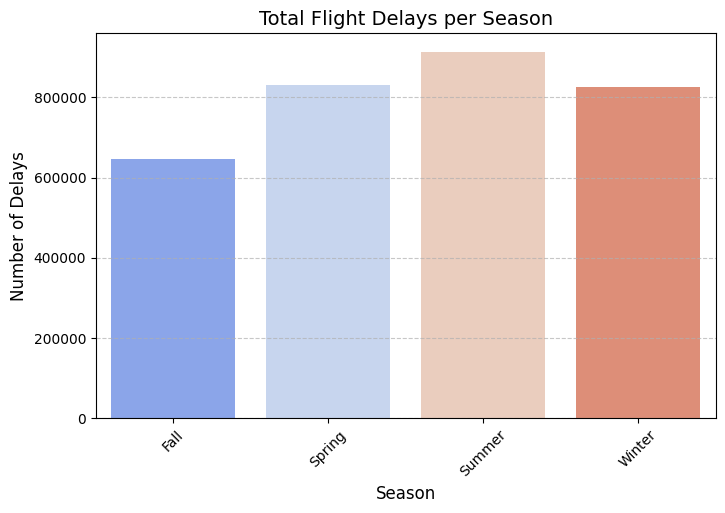

In [28]:
# Function to process each dataset
def analyze_seasonal_delays(df):
    # Convert 'date' column to datetime
    df['date'] = pd.to_datetime(df['date'])

    # Function to assign seasons
    def get_season(month):
        if month in [12, 1, 2]:
            return 'Winter'
        elif month in [3, 4, 5]:
            return 'Spring'
        elif month in [6, 7, 8]:
            return 'Summer'
        else:
            return 'Fall'

    # Create a 'season' column
    df['season'] = df['date'].dt.month.apply(get_season)

    # Consider a flight delayed if arr_delay > 0
    df['is_delayed'] = df['arr_delay'] > 0  # You can also use dep_delay

    # Count delays per season
    return df.groupby('season')['is_delayed'].sum()

# Get seasonal delays for both datasets
seasonal_delays1 = analyze_seasonal_delays(df1)
seasonal_delays2 = analyze_seasonal_delays(df2)

# Combine results from both groups
total_seasonal_delays = seasonal_delays1.add(seasonal_delays2, fill_value=0)

# Find the season with the highest delays
most_delayed_season = total_seasonal_delays.idxmax()
max_delays = total_seasonal_delays.max()

# Display results
print("Flight delays per season (Group 1):\n", seasonal_delays1)
print("Flight delays per season (Group 2):\n", seasonal_delays2)
print("Total flight delays per season:\n", total_seasonal_delays)
print(f"The season with the highest number of delayed flights is {most_delayed_season} with {max_delays} delays.")

# Plot total seasonal delays
plt.figure(figsize=(8, 5))
sns.barplot(x=total_seasonal_delays.index, y=total_seasonal_delays.values, palette="coolwarm")

# Customize the plot
plt.xlabel("Season", fontsize=12)
plt.ylabel("Number of Delays", fontsize=12)
plt.title("Total Flight Delays per Season", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

- The function `analyze_seasonal_delays(df)` processes flight data to determine seasonal delays.
- The 'date' column is converted to datetime format for proper handling.
- A helper function `get_season(month)` assigns each flight to a season based on its month.
- A new column 'season' is created in the dataset using the `apply()` function.
- Delayed flights are identified where `arr_delay > 0`.
- The total number of delayed flights is counted for each season using `groupby('season')['is_delayed'].sum()`.
- The function is applied separately to `df1` and `df2`, producing seasonal delay counts for both datasets.
- The delay counts from both datasets are summed using `add()`, filling missing values with zero.
- The season with the highest number of delays is identified using `idxmax()`, and the corresponding delay count is retrieved using `max()`.
- The results are displayed in tabular format.
- A bar graph is plotted using `sns.barplot()` to visually compare flight delays across seasons.


### Observations from graph
- Summer has the highest number of flight delays (913,956), indicating increased disruptions during this season.
- Spring and Winter have similar delay counts, with Spring slightly higher (831,843 vs. 826,312).
- Fall experiences the fewest delays (646,155), suggesting fewer disruptions compared to other seasons.
- The trend suggests that peak travel seasons (Summer and Spring) may have more delays due to increased flight traffic and possible weather-related issues.


# In which month do the highest number of flights experience delays?

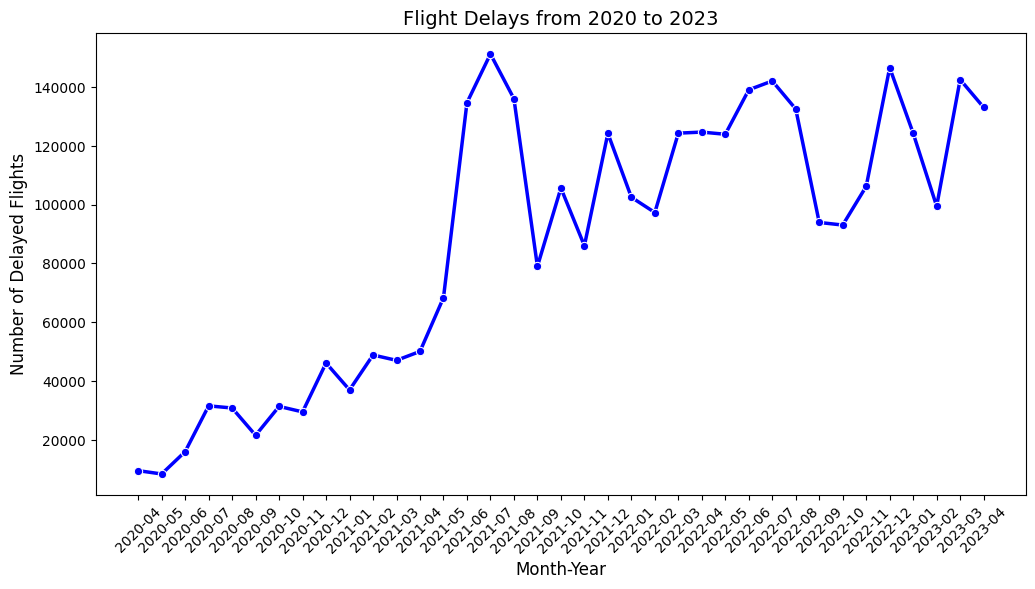

In [29]:
plt.figure(figsize=(12, 6))

# Ensure date is in datetime format
df1['date'] = pd.to_datetime(df1['date'])
df2['date'] = pd.to_datetime(df2['date'])

# Extract year-month for trends
df1['year_month'] = df1['date'].dt.to_period('M')
df2['year_month'] = df2['date'].dt.to_period('M')

# Count monthly delays
monthly_delays1 = df1.groupby('year_month')['is_delayed'].sum()
monthly_delays2 = df2.groupby('year_month')['is_delayed'].sum()

# Combine both datasets
total_monthly_delays = monthly_delays1.add(monthly_delays2, fill_value=0)

# Convert index to string for proper labeling
total_monthly_delays.index = total_monthly_delays.index.astype(str)

# Plot line graph
sns.lineplot(x=total_monthly_delays.index, y=total_monthly_delays.values, marker='o', color='b', linewidth=2.5)

# Labels and title
plt.xlabel("Month-Year", fontsize=12)
plt.ylabel("Number of Delayed Flights", fontsize=12)
plt.title("Flight Delays from 2020 to 2023", fontsize=14)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, fontsize=10)

# Show plot
plt.show()


### Code Explanation:  
- Imports `matplotlib.pyplot` and `seaborn` for data visualization.  
- Ensures the `date` column in `df1` and `df2` is in datetime format.  
- Extracts the `year_month` (YYYY-MM) from the `date` column.  
- Counts the number of delayed flights per month for both datasets.  
- Merges the monthly delay counts from both datasets.  
- Converts the index to a string format for better labeling.  
- Plots a line graph to visualize flight delays over time.  
- Labels axes, sets a title, and rotates x-axis labels for readability.  

### Observations from the Graph:  
- The highest number of delays occurred in **July 2021** (151,268 delays).  
- Other peak months include **June 2021, July 2022, and December 2022** with over 140,000 delays.  
- Delays were relatively lower in early 2020, likely due to reduced air travel.  
- A significant increase in delays is observed from mid-2021 onwards, possibly due to post-pandemic travel recovery.  
- December months consistently show high delays, possibly due to holiday travel congestion.  


# What is the trend of flight delays from 2020 to 2023?

Delays from df1:
 year
2020    121814
2021    561402
2022    729355
2023    259454
Name: is_delayed, dtype: int64
Delays from df2:
 year
2020    102675
2021    506656
2022    696950
2023    239960
Name: is_delayed, dtype: int64


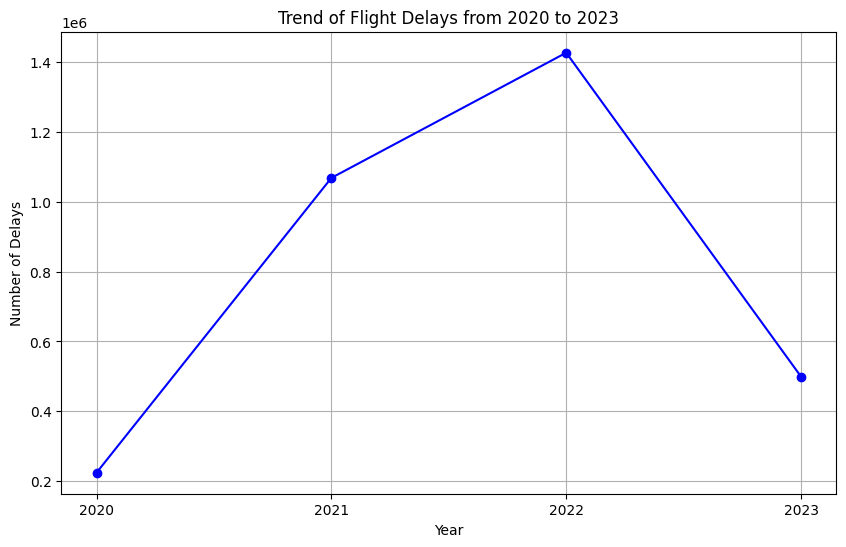

In [30]:

# Function to extract year and count delays for each DataFrame
def count_delays_by_year(df):
    # Convert 'date' column to datetime (ensure column name is correct)
    if 'date' not in df.columns:
        print("Error: 'date' column not found in DataFrame")
        return None

    df['date'] = pd.to_datetime(df['date'], errors='coerce')

    # Drop rows where 'date' conversion failed
    df = df.dropna(subset=['date'])

    # Extract the year from the 'date' column
    df['year'] = df['date'].dt.year

    # Ensure the 'arr_delay' column exists
    if 'arr_delay' not in df.columns:
        print("Error: 'arr_delay' column not found in DataFrame")
        return None

    # Identify delayed flights (arr_delay > 0)
    df['is_delayed'] = df['arr_delay'] > 0

    # Group by year and count delayed flights
    yearly_delays = df.groupby('year')['is_delayed'].sum()

    return yearly_delays

# Get delays trend for both DataFrames
delays_df1 = count_delays_by_year(df1)
delays_df2 = count_delays_by_year(df2)

# Ensure data was correctly extracted
print("Delays from df1:\n", delays_df1)
print("Delays from df2:\n", delays_df2)

# Combine the yearly delays from both DataFrames
if delays_df1 is not None and delays_df2 is not None:
    delays_combined = delays_df1.add(delays_df2, fill_value=0)

    # Check if data is empty
    if delays_combined.empty:
        print("Error: No delay data found. Check column names and values.")
    else:
        # Plot the trend of flight delays from 2020 to 2023
        plt.figure(figsize=(10, 6))
        delays_combined.loc[2020:2023].plot(kind='line', marker='o', linestyle='-', color='b')
        plt.title('Trend of Flight Delays from 2020 to 2023')
        plt.xlabel('Year')
        plt.ylabel('Number of Delays')
        plt.grid(True)
        plt.xticks(range(2020, 2024))
        plt.show()


- **Function `count_delays_by_year(df)`**  
  - Converts the `'date'` column to datetime format.  
  - Extracts the year from the `'date'` column.  
  - Identifies delayed flights where `'arr_delay' > 0`.  
  - Groups data by year and counts delayed flights.  

- **Processing the DataFrames (`df1` and `df2`)**  
  - Calls `count_delays_by_year(df1)` and `count_delays_by_year(df2)`.  
  - Prints the yearly delay counts for both datasets.  

- **Combining and Plotting Data**  
  - Adds yearly delay counts from `df1` and `df2`.  
  - Plots a line graph showing the trend of flight delays from 2020 to 2023.  

### Observations from the Graph
- Flight delays increased significantly from 2020 to 2022.  
- The highest number of delays occurred in 2022.  
- A sharp decline in delays was observed in 2023.  
- Possible reasons for trends:  
  - 2020: Fewer flights due to COVID-19 restrictions.  
  - 2021-2022: Increased air traffic as travel rebounded.  
  - 2023: Possible improvements in airline operations or fewer flights.  


# Which airport experiences the highest total delay minutes for both departures and arrivals?

Airport with the highest total delay minutes: Dallas/Fort Worth, TX (20091402.0 minutes)


<Figure size 1200x600 with 0 Axes>

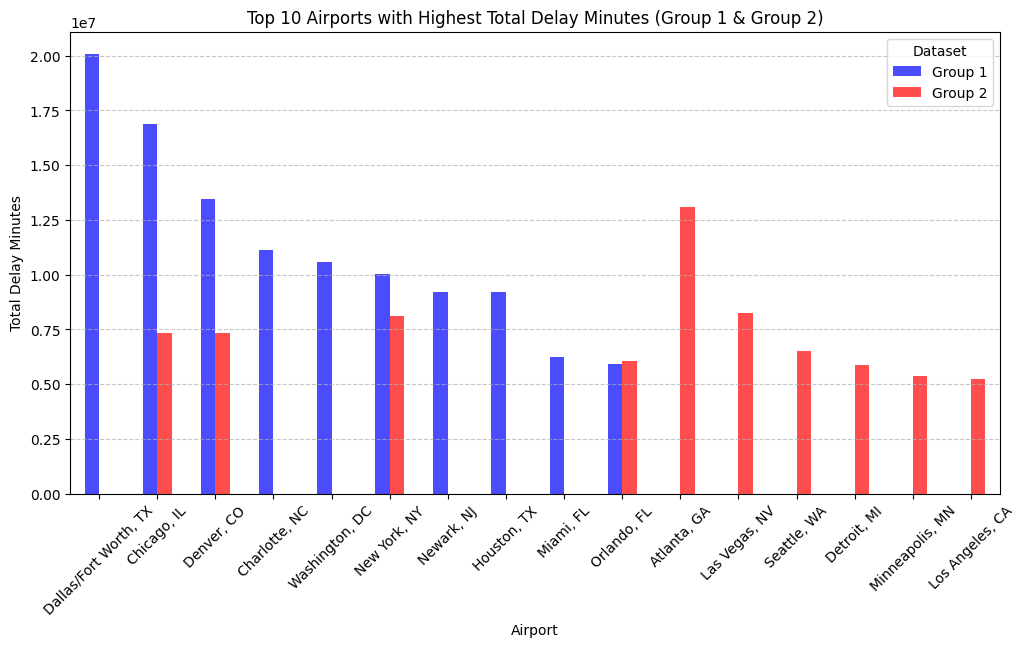

In [31]:
# Compute total delay (departure + arrival) for each airport in df1
df1['total_delay_min'] = df1['dep_delay_min'] + df1['arr_delay_min']
airport_delays_1 = df1.groupby('origin')['total_delay_min'].sum()

# Compute total delay (departure + arrival) for each airport in df2
df2['total_delay_min'] = df2['dep_delay_min'] + df2['arr_delay_min']
airport_delays_2 = df2.groupby('origin')['total_delay_min'].sum()

# Find the airport with the highest delay in each dataset
max_airport_1 = airport_delays_1.idxmax()
max_delay_1 = airport_delays_1.max()

max_airport_2 = airport_delays_2.idxmax()
max_delay_2 = airport_delays_2.max()

# Determine the overall highest
if max_delay_1 > max_delay_2:
    highest_airport = max_airport_1
    highest_delay = max_delay_1
else:
    highest_airport = max_airport_2
    highest_delay = max_delay_2

# Display results
print(f"Airport with the highest total delay minutes: {highest_airport} ({highest_delay} minutes)")

# Sort by delay minutes and get the top 10 airports for each dataset
top_airports_1 = airport_delays_1.sort_values(ascending=False).head(10)
top_airports_2 = airport_delays_2.sort_values(ascending=False).head(10)

# Combine both datasets for plotting
combined_delays = pd.concat([top_airports_1, top_airports_2], axis=1)
combined_delays.columns = ['Group 1', 'Group 2']

# Plot the delays
plt.figure(figsize=(12, 6))
combined_delays.plot(kind='bar', figsize=(12, 6), color=['blue', 'red'], alpha=0.7)

# Formatting the plot
plt.xlabel("Airport")
plt.ylabel("Total Delay Minutes")
plt.title("Top 10 Airports with Highest Total Delay Minutes (Group 1 & Group 2)")
plt.legend(title="Dataset")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

- **Calculate Total Delay for Each Airport**  
  - Creates a new column `'total_delay_min'` by summing `'dep_delay_min'` and `'arr_delay_min'`.  
  - Groups data by `'origin'` (airport) and sums total delays for both datasets (`df1` and `df2`).  

- **Find the Airport with the Highest Delay**  
  - Identifies the airport with the highest total delay in each dataset using `.idxmax()` and `.max()`.  
  - Compares the highest delays from both datasets to find the overall airport with the highest delay.  

- **Top 10 Airports by Delay**  
  - Sorts airports by total delay and selects the top 10 airports from each dataset.  
  - Combines the top 10 airports from both datasets into a single dataframe.  

- **Plot the Data**  
  - Creates a bar plot comparing the top 10 airports with the highest total delay minutes from both datasets.  
  - Customizes the plot with labels, title, legend, and grid.  

### Observations from the Graph
- **Airport with the Highest Total Delay**: Dallas/Fort Worth, TX has the highest total delay with 20,091,402 minutes.  
- **Top 10 Airports (Group 1)**:  
  - Dallas/Fort Worth, TX has the highest delay.  
  - Chicago, IL, and Denver, CO also have significant delays.  
  - Airports in the top 10 are mostly major hubs in the US.  

- **Top 10 Airports (Group 2)**:  
  - Atlanta, GA leads with the highest total delay for Group 2.  
  - New York, NY and Chicago, IL also feature in the top 5.  
  - Other major airports like Las Vegas, NV and Seattle, WA are also among the top 10.  

- **Bar Graph Analysis**:  
  - Dallas/Fort Worth, TX stands out with a much higher delay than any other airport.  
  - Other airports like Chicago, IL and Denver, CO consistently appear in both groups' top lists.  


# What factors contribute to departure and arrival delays?

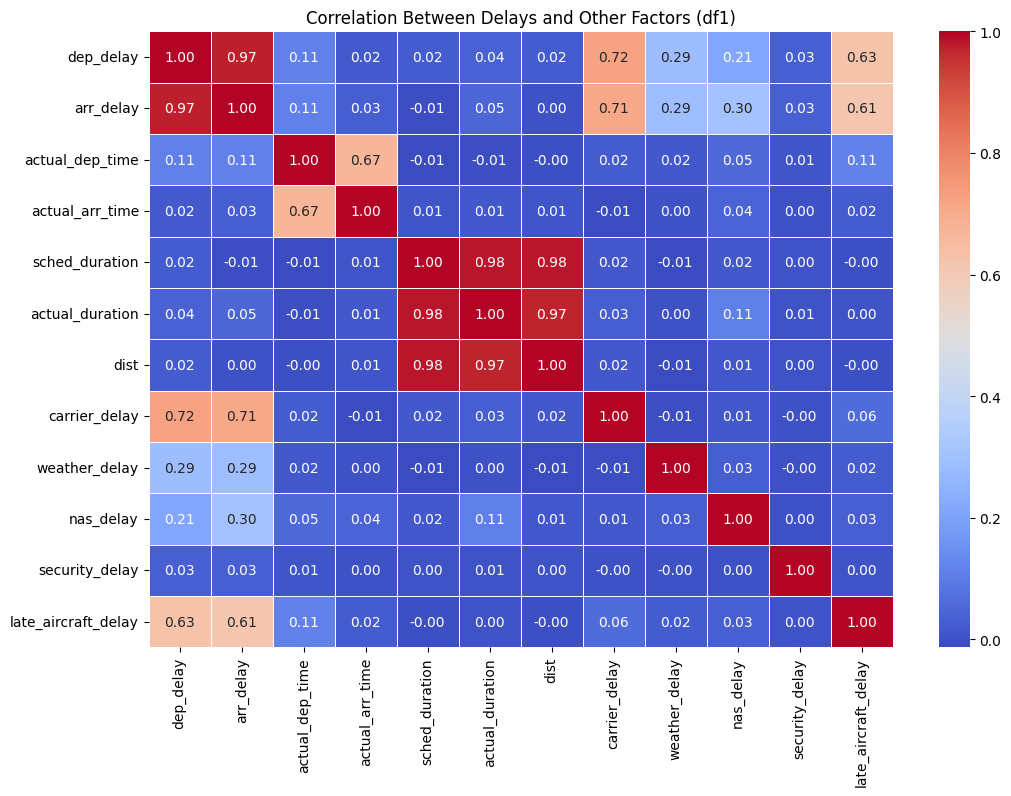

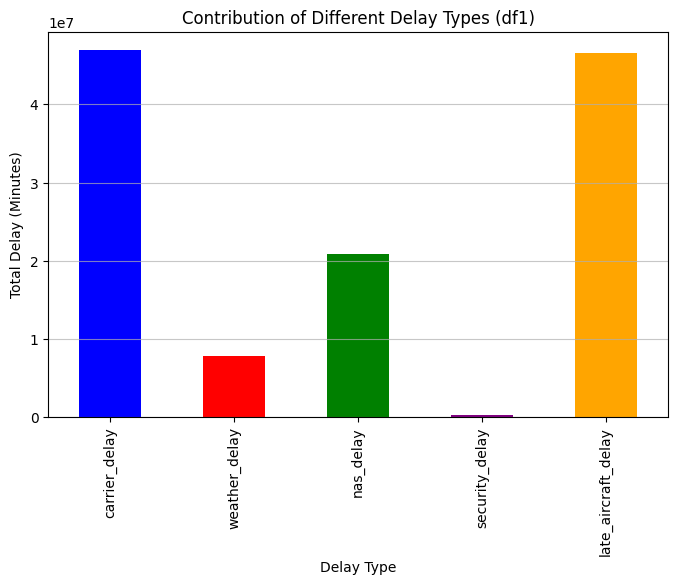

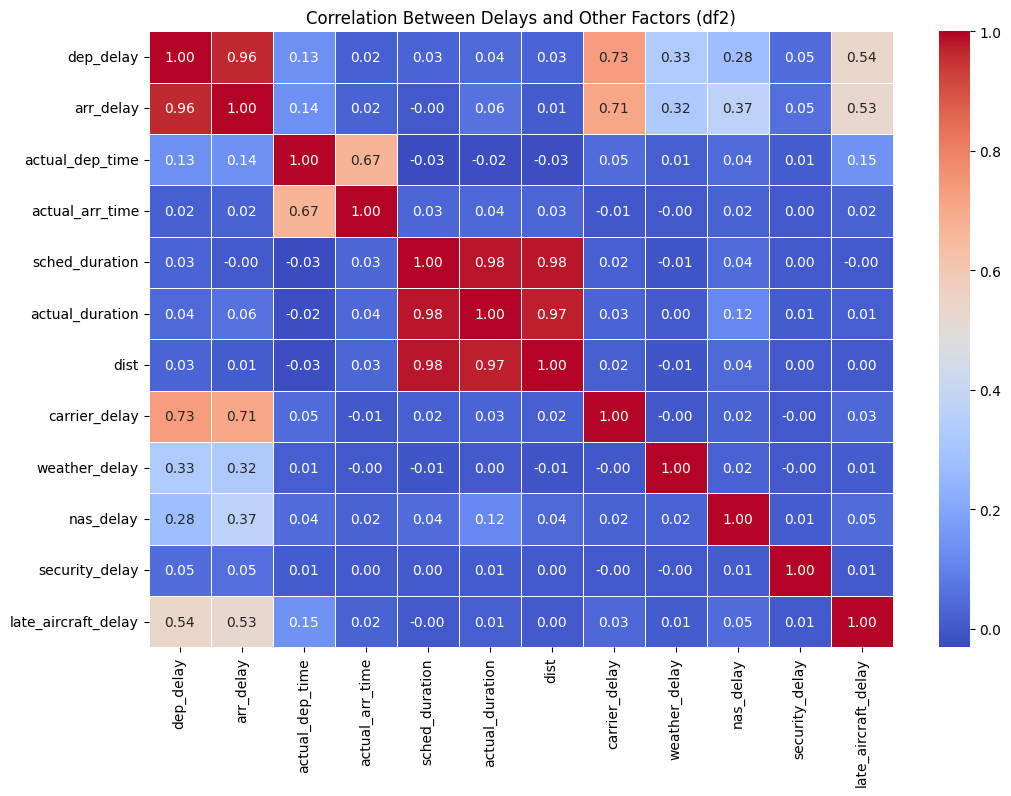

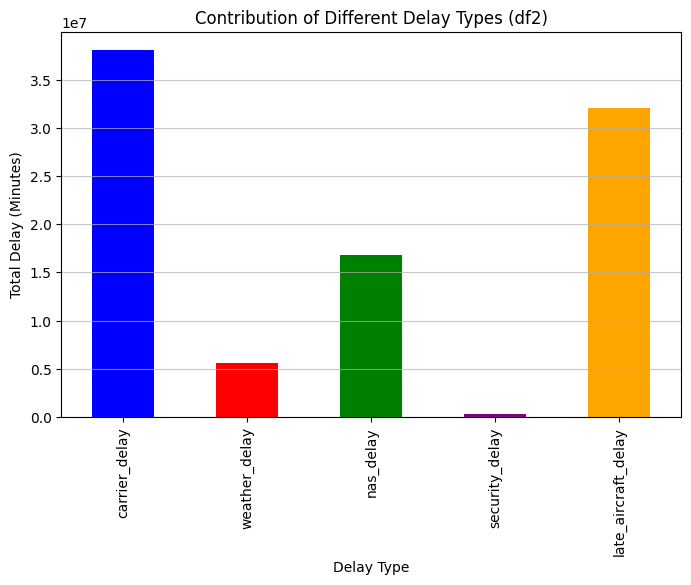

Top delay factors in df1:
 carrier_delay          46947743.0
late_aircraft_delay    46624680.0
nas_delay              20896829.0
weather_delay           7842683.0
security_delay           210019.0
dtype: float64

Top delay factors in df2:
 carrier_delay          38091628.0
late_aircraft_delay    32059773.0
nas_delay              16789444.0
weather_delay           5573770.0
security_delay           330208.0
dtype: float64


In [32]:
# Function to analyze delay factors
def analyze_delay_factors(df, title_suffix=""):
    # Select numerical columns for correlation
    delay_factors = ['dep_delay', 'arr_delay', 'actual_dep_time', 'actual_arr_time', 'sched_duration', 'actual_duration',
                     'dist','carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']

    # Keep only numeric columns and drop NaNs
    df_numeric = df[delay_factors].dropna()

    # Compute correlation matrix
    corr_matrix = df_numeric.corr()

    # Display correlation heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title(f"Correlation Between Delays and Other Factors {title_suffix}")
    plt.show()

    # Summarize delay reasons
    delay_reasons = df[['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']].sum()

    # Plot contribution of different delay types
    plt.figure(figsize=(8, 5))
    delay_reasons.plot(kind='bar', color=['blue', 'red', 'green', 'purple', 'orange'])
    plt.title(f"Contribution of Different Delay Types {title_suffix}")
    plt.xlabel("Delay Type")
    plt.ylabel("Total Delay (Minutes)")
    plt.grid(axis='y', linestyle='-', alpha=0.7)
    plt.show()

    return delay_reasons.sort_values(ascending=False)

# Run analysis for both datasets
delay_factors_df1 = analyze_delay_factors(df1, "(df1)")
delay_factors_df2 = analyze_delay_factors(df2, "(df2)")

# Display results
print("Top delay factors in df1:\n", delay_factors_df1)
print("\nTop delay factors in df2:\n", delay_factors_df2)


- **Function for Analyzing Delay Factors**:  
  - The function `analyze_delay_factors(df, title_suffix="")` is designed to analyze the correlation and contribution of different delay factors in flight data.
  
- **Select Delay Factors**:  
  - The function focuses on the columns related to delays: `dep_delay`, `arr_delay`, `actual_dep_time`, `actual_arr_time`, etc., including various types of delay (carrier, weather, NAS, security, and late aircraft).

- **Correlation Heatmap**:  
  - The function calculates the correlation matrix between the selected delay factors. A heatmap is plotted to visualize the strength of correlation between delays and other factors.
  
- **Delay Type Contributions**:  
  - The function sums the total minutes for each delay type (e.g., carrier delay, weather delay) and generates a bar plot to show the relative contributions of each delay type to total delays.
  
- **Run Analysis**:  
  - The function is applied to two datasets (`df1` and `df2`) to analyze delay factors separately for each dataset.
  
- **Display Results**:  
  - The function returns the delay reasons sorted in descending order, providing insights into which delay factors are most significant.

### Observations from the Graphs
- **Correlation Heatmap**:  
  - The heatmap displays the correlation between different delay factors. Strong correlations suggest that certain delays are linked to one another (e.g., `carrier_delay` and `late_aircraft_delay`).

- **Top Delay Factors (df1)**:  
  - The most significant delay factor is `carrier_delay`, contributing 46,947,743 minutes of delay.
  - `Late_aircraft_delay` follows closely with 46,624,680 minutes.
  - Other notable delay factors include `nas_delay` (20,896,829 minutes) and `weather_delay` (7,842,683 minutes).
  - `Security_delay` has the smallest contribution (210,019 minutes).

- **Top Delay Factors (df2)**:  
  - Similarly, `carrier_delay` is the largest contributor to delays (38,091,628 minutes).
  - `Late_aircraft_delay` is also significant (32,059,773 minutes), followed by `nas_delay` (16,789,444 minutes).
  - `Weather_delay` (5,573,770 minutes) and `security_delay` (330,208 minutes) have smaller impacts on delays.

- **Bar Graph Insights**:  
  - Both datasets show that `carrier_delay` and `late_aircraft_delay` are the most significant contributors to delays.
  - The contribution of `security_delay` is minimal in both datasets.
  - The bar graph helps visualize how much each type of delay contributes to the overall total delay minutes.


# Which airline accumulates the most delay minutes?

Total delay minutes for Group 1 Airlines:
 airline
American Airlines    116699451.0
United Airlines       82839438.0
JetBlue Airways       25727510.0
Frontier Airlines     14030861.0
Hawaiian Airlines      2852413.0
Name: total_delay, dtype: float64
Total delay minutes for Group 2 Airlines:
 airline
Delta Air Lines       72136051.0
Southwest Airlines    71059699.0
Spirit Airlines       16948049.0
Alaska Airlines       15620272.0
Allegiant Air         12400120.0
Name: total_delay, dtype: float64


<ipython-input-33-856fbe3405b2>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=combined_delays.index, y=combined_delays.values, palette='viridis')


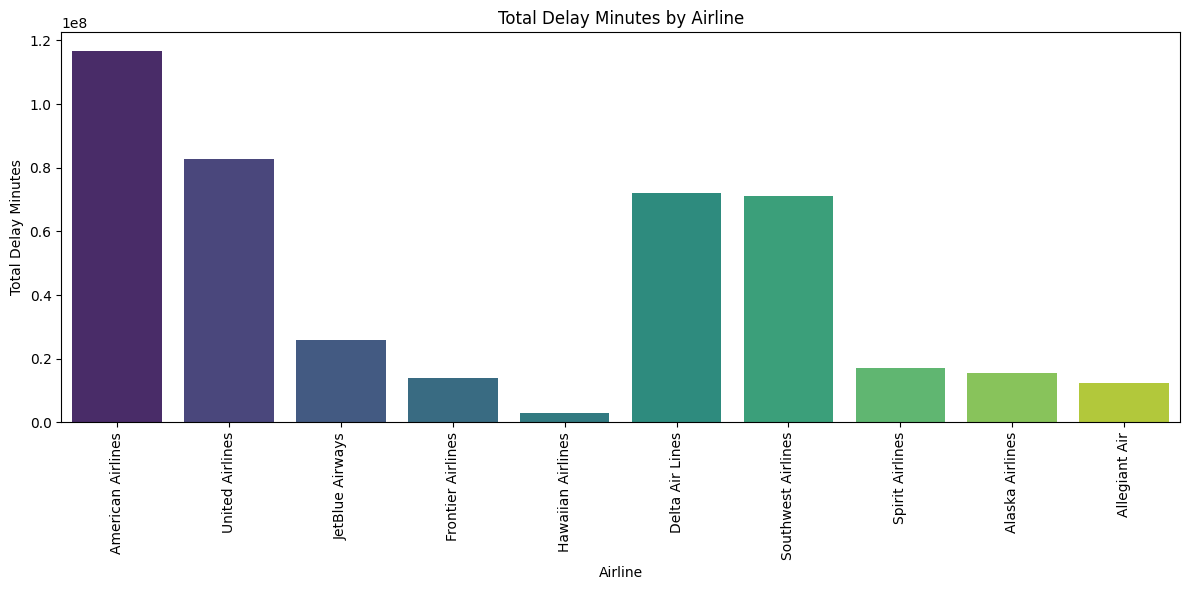

In [33]:
# Calculate the total accumulated delay minutes for each airline
def calculate_total_delays(df, group_name):
    # Group by 'airline' and sum the departure and arrival delay minutes
    df['total_delay'] = df['dep_delay_min'] + df['arr_delay_min']
    airline_delays = df.groupby('airline')['total_delay'].sum().sort_values(ascending=False)

    print(f"Total delay minutes for {group_name}:\n", airline_delays)

    return airline_delays

# Calculate delays for Group 1 and Group 2 airlines separately
group1_delays = calculate_total_delays(df1, "Group 1 Airlines")
group2_delays = calculate_total_delays(df2, "Group 2 Airlines")

# Combine both group results into one DataFrame for easier plotting
combined_delays = pd.concat([group1_delays, group2_delays], axis=0)

# Plotting the accumulated delays
plt.figure(figsize=(12, 6))
sns.barplot(x=combined_delays.index, y=combined_delays.values, palette='viridis')
plt.title('Total Delay Minutes by Airline')
plt.xlabel('Airline')
plt.ylabel('Total Delay Minutes')
plt.xticks(rotation=90)  # Rotate airline names for better readability
plt.tight_layout()
plt.show()


- **Function to Calculate Total Delay**:  
  - The function `calculate_total_delays(df, group_name)` is used to calculate the total delay minutes (departure + arrival) for each airline.
  - The function groups the dataset by 'airline', sums the delay minutes, and sorts the airlines by total delay in descending order.

- **Grouping and Summing Delays**:  
  - The function is applied to both datasets (Group 1 and Group 2), calculating the total accumulated delay minutes for each airline in both groups.

- **Plotting**:  
  - After calculating the total delays for both groups, the results are combined into a single DataFrame (`combined_delays`).
  - A bar plot is created using seaborn's `barplot` function, where the airlines are plotted on the x-axis and the total delay minutes are plotted on the y-axis.
  - The graph is customized with title, axis labels, and rotation of airline names for readability.

- **Displaying Results**:  
  - The `calculate_total_delays` function prints the total delay minutes for each airline in both groups.
  - The plot displays a combined view of the delay minutes for both group airlines.

### Observations from the Graph
- *** Airlines**:  
  - **American Airlines** accumulates the most delay minutes (116,699,451 minutes).
  - **United Airlines** follows with 82,839,438 minutes of delay.
  - **JetBlue Airways** has significantly fewer delays, with 25,727,510 minutes.
  - **Frontier Airlines** and **Hawaiian Airlines** have much smaller accumulated delays (14,030,861 and 2,852,413 minutes, respectively).

  - **Delta Air Lines** has the highest accumulated delay minutes (72,136,051 minutes)in group 2, closely followed by **Southwest Airlines** with 71,059,699 minutes.
  - **Spirit Airlines** has a notable delay total of 16,948,049 minutes, while **Alaska Airlines** and **Allegiant Air** have relatively smaller delays (15,620,272 and 12,400,120 minutes, respectively).

- **Graph Insights**:  
  - **American Airlines** in Group 1 stands out with the highest total delay minutes, significantly surpassing others in both groups.
  - The bar graph makes it clear that airlines in Group 1 tend to have higher accumulated delay minutes compared to Group 2.
  - The graph visually highlights which airlines are contributing the most to delays, with American Airlines and Delta Air Lines being the top contributors in their respective groups.


# During which part of the day (morning, afternoon, or evening) do delays occur most frequently?

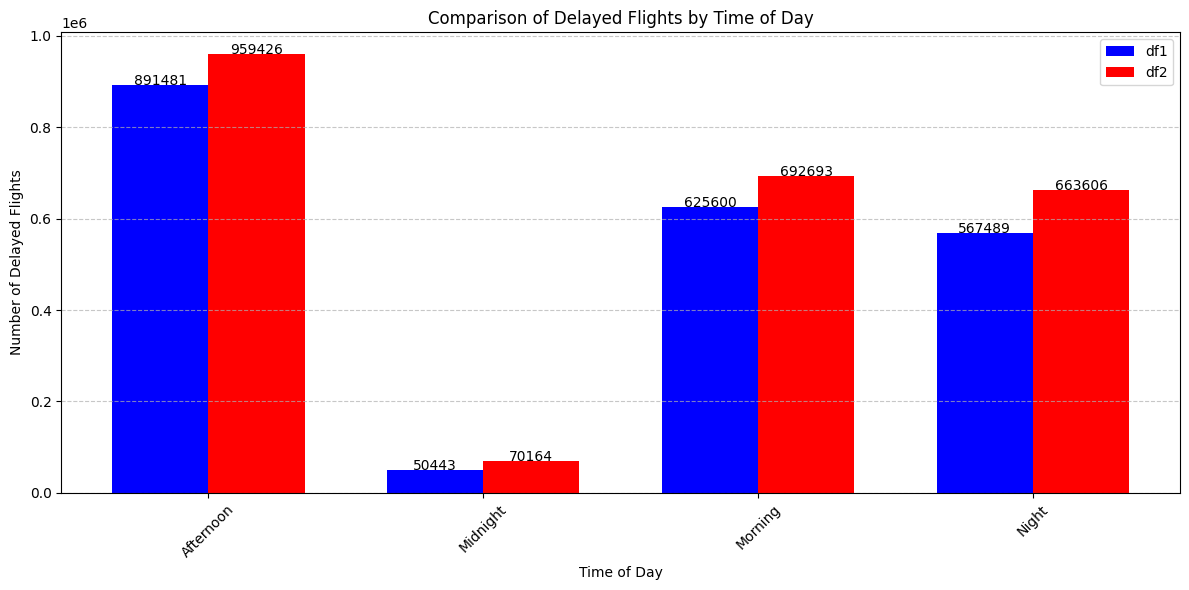

In [34]:
def compute_delay_stats(df):
    """Compute delay statistics for a given dataframe"""
    delayed_flights = df[df['dep_delay'] > 0]
    delay_stats = delayed_flights.groupby('sched_dep_time')['dep_delay'].count().reset_index()
    delay_stats.columns = ['Time of Day', 'Number of Delayed Flights']
    return delay_stats

# Compute delay stats for df1 and df2
df1_delay_stats = compute_delay_stats(df1)
df2_delay_stats = compute_delay_stats(df2)

# Merge both DataFrames on 'sched_dep_time' (Time of Day)
combined_delay_stats = pd.merge(df1_delay_stats, df2_delay_stats, on='Time of Day', how='outer')
combined_delay_stats.fillna(0, inplace=True)  # Fill any NaN values with 0 (in case of missing data)


# Plot combined bar graph
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(combined_delay_stats))

# Twin bars for df1 and df2
bars1 = plt.bar(index, combined_delay_stats['Number of Delayed Flights_x'], bar_width, label='df1', color='blue')
bars2 = plt.bar([i + bar_width for i in index], combined_delay_stats['Number of Delayed Flights_y'], bar_width, label='df2', color='red')

# Annotate bars with values
for bar in bars1:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, str(int(bar.get_height())),
             ha='center', fontsize=10, color='black')

for bar in bars2:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, str(int(bar.get_height())),
             ha='center', fontsize=10, color='black')

# Labels and title
plt.xlabel("Time of Day")
plt.ylabel("Number of Delayed Flights")
plt.title("Comparison of Delayed Flights by Time of Day")
plt.xticks([i + bar_width / 2 for i in index], combined_delay_stats['Time of Day'], rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


- **Function to Compute Delay Stats**:  
  - The `compute_delay_stats(df)` function filters the flights with departure delays (where 'dep_delay' > 0).
  - It then groups the data by the scheduled departure time ('sched_dep_time') and counts the number of delayed flights at each time.
  - The resulting DataFrame contains two columns: "Time of Day" and "Number of Delayed Flights".

- **Compute Delay Stats for Both Datasets**:  
  - The function is applied to both datasets (df1 and df2) to calculate the number of delayed flights for each time of day.

- **Combining the DataFrames**:  
  - The delay statistics for both datasets (df1 and df2) are merged into a single DataFrame, aligned by "Time of Day".
  - Any missing values (NaN) from the merge operation are filled with 0 to ensure complete data.

- **Plotting**:  
  - A bar plot is created to compare the number of delayed flights by time of day for both datasets.
  - Two bars are plotted for each time of day: one for df1 (blue) and one for df2 (red).
  - The plot includes axis labels, title, rotated x-tick labels for readability, and a legend to distinguish between df1 and df2.

- **Bar Graph Layout**:  
  - The bar widths are adjusted for clarity, and gridlines are added for better visualization.

### Observations from the Graph
- **Morning Delays**:  
  - Both df1 and df2 have a high number of delays in the morning, with df2 having slightly more delays than df1.  
  - df1: 625,600 delays, df2: 692,693 delays.

- **Afternoon Delays**:  
  - The highest number of delays for both datasets occurs in the afternoon.  
  - df1: 891,481 delays, df2: 959,426 delays. This indicates that afternoon flights experience the most delays overall.

- **Night Delays**:  
  - The number of delays during the night is relatively high, with df1 having 567,489 delays and df2 having 663,606 delays.

- **Midnight Delays**:  
  - The midnight delays are the lowest for both datasets, with df1 at 50,443 delays and df2 at 70,164 delays.

- **General Trend**:  
  - The number of delays increases as the day progresses, with the most delays in the afternoon for both datasets.  
  - Both datasets show a similar pattern, but df2 consistently has a higher number of delayed flights compared to df1.


## Fit a Distribution to Arrival and Departure Delays for a Single Airline: Analyze Modality and Statistical Moments (Center, Variance, Skewness, Kurtosis), and Graphically Present the Distribution.
Calculate and Plot the Probability Mass Function (PMF) for Discrete Values or Ranges (if using a histogram)
# For departure delays

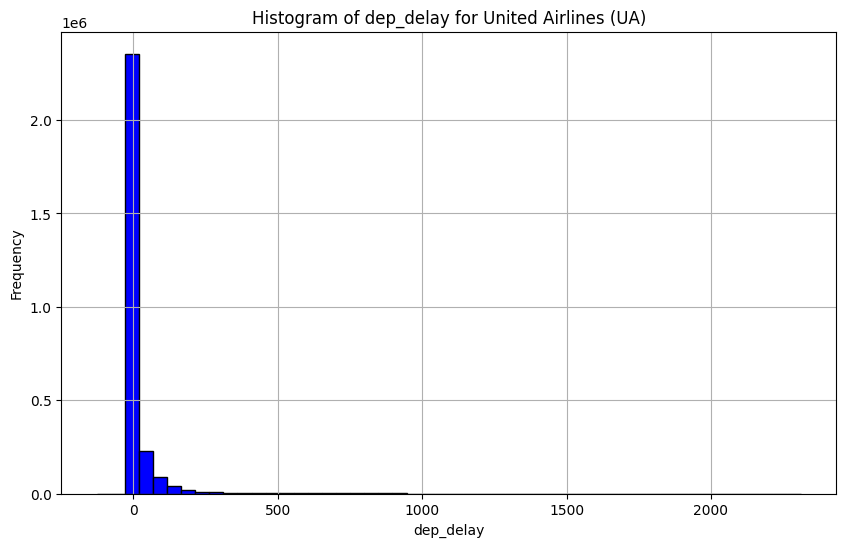


Statistics for dep_delay distribution of United Airlines (UA):
Mean (Center): 10.665280405874592
Variance: 3444.2424995411916
Skewness: 9.812939321348912
Kurtosis: 146.1365857314489
The distribution is positively skewed (right-skewed).
The distribution has heavy tails (leptokurtic).


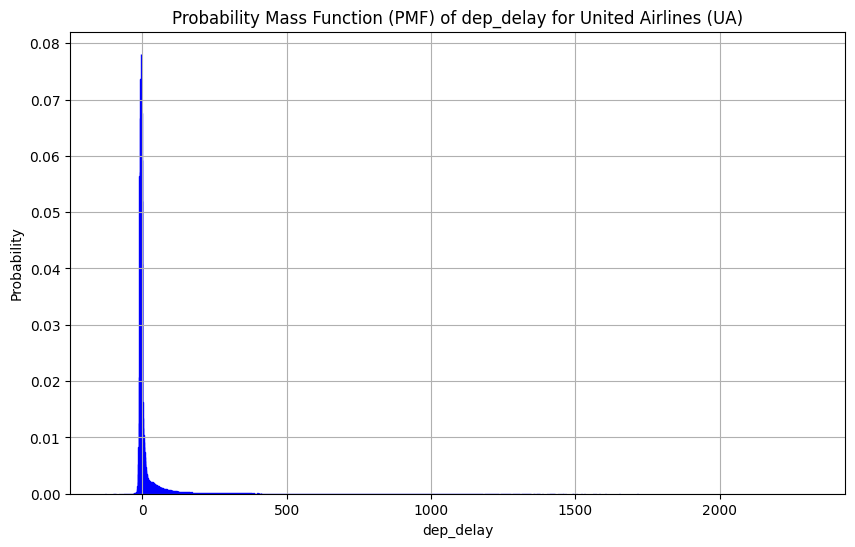

In [35]:


# Function to filter by airline and fit distribution
def fit_distribution_and_stats(df, airline_code, delay_column):
    # Filter data by airline
    df_airline = df[df['airline'] == airline_code]

    # Drop NaN values in delay column
    df_airline = df_airline.dropna(subset=[delay_column])

    # Return the filtered delay data
    return df_airline[delay_column]

# Function to plot distribution for United Airlines with Matplotlib
def plot_distribution_for_united(df1, delay_column):
    airline_code = 'United Airlines'  # United Airlines code in df1

    # Get the delay data for United Airlines
    delay_data_df1 = fit_distribution_and_stats(df1, airline_code, delay_column)

    # Create a histogram using Matplotlib
    plt.figure(figsize=(10, 6))
    plt.hist(delay_data_df1, bins=50, color='blue', edgecolor='black')
    plt.title(f'Histogram of {delay_column} for United Airlines (UA)')
    plt.xlabel(delay_column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

    # Calculate statistical moments
    mean = delay_data_df1.mean()
    variance = delay_data_df1.var()
    skewness = stats.skew(delay_data_df1)
    kurtosis = stats.kurtosis(delay_data_df1)

    # Describe the distribution and statistics
    print(f"\nStatistics for {delay_column} distribution of United Airlines (UA):")
    print(f"Mean (Center): {mean}")
    print(f"Variance: {variance}")
    print(f"Skewness: {skewness}")
    print(f"Kurtosis: {kurtosis}")

    # Describe the type of distribution (modality)
    if skewness > 0:
        print("The distribution is positively skewed (right-skewed).")
    elif skewness < 0:
        print("The distribution is negatively skewed (left-skewed).")
    else:
        print("The distribution is symmetric.")

    if kurtosis > 3:
        print("The distribution has heavy tails (leptokurtic).")
    elif kurtosis < 3:
        print("The distribution has light tails (platykurtic).")
    else:
        print("The distribution has normal tails (mesokurtic).")

# Example usage:
# Choose a delay column ('dep_delay' or 'arr_delay') for United Airlines
delay_column = 'dep_delay'  # For departure delays (use 'arr_delay' for arrival delays)

# Plot and analyze for United Airlines from df1
plot_distribution_for_united(df1, delay_column)

# Function to calculate and plot PMF for United Airlines with Matplotlib
def plot_pmf_for_united(df1, delay_column):
    airline_code = 'United Airlines'  # United Airlines code in df1

    # Get the delay data for United Airlines
    delay_data_df1 = fit_distribution_and_stats(df1, airline_code, delay_column)

    # Drop NaN values for the delay column
    delay_data_df1 = delay_data_df1.dropna()

    # Calculate the PMF by counting the occurrences of each delay value
    pmf_values = delay_data_df1.value_counts(normalize=True).sort_index()

    # Plot the PMF as a bar plot using Matplotlib
    plt.figure(figsize=(10, 6))
    plt.bar(pmf_values.index, pmf_values.values, width=1.0, color='blue', edgecolor='blue')
    plt.title(f'Probability Mass Function (PMF) of {delay_column} for United Airlines (UA)')
    plt.xlabel(delay_column)
    plt.ylabel('Probability')
    plt.grid(True)
    plt.show()


# Example usage:
# Choose a delay column ('dep_delay' or 'arr_delay') for United Airlines
delay_column = 'dep_delay'  # For departure delays (use 'arr_delay' for arrival delays)

# Plot and analyze for United Airlines from df1
plot_pmf_for_united(df1, delay_column)

- **Function `fit_distribution_and_stats`**:
  - Filters data for a specific airline (`airline_code`).
  - Drops any NaN values from the chosen delay column (`delay_column`).
  - Returns the filtered delay data for further analysis.

- **Function `plot_distribution_for_united`**:
  - Uses the filtered delay data for United Airlines.
  - Plots a histogram of the delay data using Matplotlib.
  - Calculates and displays statistical moments:
    - **Mean**: Measures the center of the distribution.
    - **Variance**: Measures the spread of the distribution.
    - **Skewness**: Measures the asymmetry of the distribution.
    - **Kurtosis**: Measures the "tailedness" of the distribution.
  - Describes the distribution based on skewness and kurtosis:
    - **Skewness**:
      - Positive skew means the distribution is right-skewed.
      - Negative skew means the distribution is left-skewed.
    - **Kurtosis**:
      - Kurtosis > 3 means heavy tails (leptokurtic).
      - Kurtosis < 3 means light tails (platykurtic).
      - Kurtosis = 3 means normal tails (mesokurtic).

- **Function `plot_pmf_for_united`**:
  - Calculates the Probability Mass Function (PMF) for the delay data.
  - Plots the PMF as a bar plot, showing the probability of each delay value.

### Observations from the Output
- **Statistics for Departure Delay (dep_delay) of United Airlines**:
  - **Mean (Center)**: 10.67 minutes — The average departure delay for United Airlines is around 10.67 minutes.
  - **Variance**: 3444.24 — The high variance indicates a large spread in the delay values.
  - **Skewness**: 9.81 — The distribution is heavily **positively skewed** (right-skewed), meaning most delays are shorter, but there are a few large delays dragging the mean to the right.
  - **Kurtosis**: 146.14 — The distribution has **heavy tails (leptokurtic)**, indicating that there are extreme delay values more frequently than in a normal distribution.

- **Graph Insights**:
  - **Histogram**: The histogram shows that the majority of delays are concentrated around the lower values, with a few large delay spikes.
  - **Skewness**: The right-skewness is evident from the long tail on the right side of the histogram, suggesting a few flights have significantly longer delays.
  - **Kurtosis**: The heavy tails suggest that extreme delays (high departure delays) are more common than expected in a normal distribution.


## For Arrival Delays

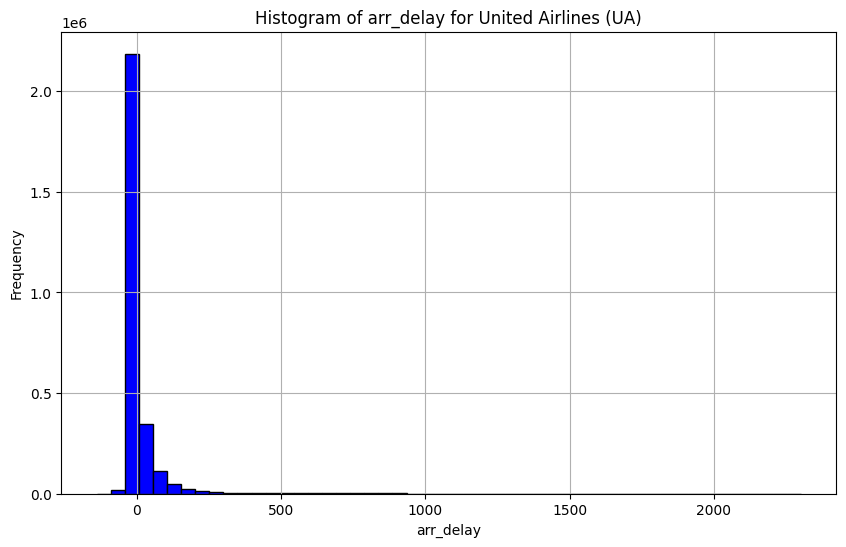


Statistics for arr_delay distribution of United Airlines (UA):
Mean (Center): 3.487178263083582
Variance: 3738.3740740761446
Skewness: 8.878754874055065
Kurtosis: 126.71926232743459
The distribution is positively skewed (right-skewed).
The distribution has heavy tails (leptokurtic).


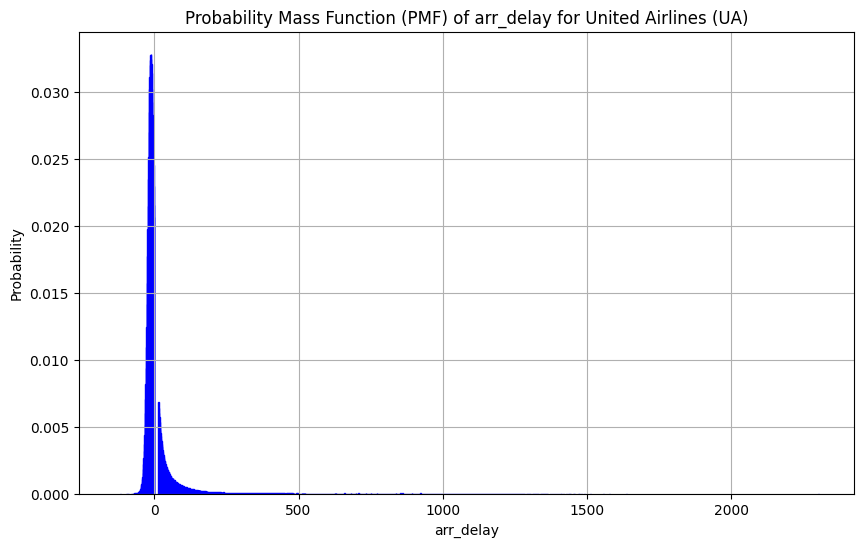

In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

# Function to filter by airline and fit distribution
def fit_distribution_and_stats(df, airline_code, delay_column):
    # Filter data by airline
    df_airline = df[df['airline'] == airline_code]

    # Drop NaN values in delay column
    df_airline = df_airline.dropna(subset=[delay_column])

    # Return the filtered delay data
    return df_airline[delay_column]

# Function to plot distribution for United Airlines with Matplotlib
def plot_distribution_for_united(df1, delay_column):
    airline_code = 'United Airlines'  # United Airlines code in df1

    # Get the delay data for United Airlines
    delay_data_df1 = fit_distribution_and_stats(df1, airline_code, delay_column)

    # Create a histogram using Matplotlib
    plt.figure(figsize=(10, 6))
    plt.hist(delay_data_df1, bins=50, color='blue', edgecolor='black')
    plt.title(f'Histogram of {delay_column} for United Airlines (UA)')
    plt.xlabel(delay_column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

    # Calculate statistical moments
    mean = delay_data_df1.mean()
    variance = delay_data_df1.var()
    skewness = stats.skew(delay_data_df1)
    kurtosis = stats.kurtosis(delay_data_df1)

    # Describe the distribution and statistics
    print(f"\nStatistics for {delay_column} distribution of United Airlines (UA):")
    print(f"Mean (Center): {mean}")
    print(f"Variance: {variance}")
    print(f"Skewness: {skewness}")
    print(f"Kurtosis: {kurtosis}")

    # Describe the type of distribution (modality)
    if skewness > 0:
        print("The distribution is positively skewed (right-skewed).")
    elif skewness < 0:
        print("The distribution is negatively skewed (left-skewed).")
    else:
        print("The distribution is symmetric.")

    if kurtosis > 3:
        print("The distribution has heavy tails (leptokurtic).")
    elif kurtosis < 3:
        print("The distribution has light tails (platykurtic).")
    else:
        print("The distribution has normal tails (mesokurtic).")

# Function to calculate and plot PMF for United Airlines with Matplotlib
def plot_pmf_for_united(df1, delay_column):
    airline_code = 'United Airlines'  # United Airlines code in df1

    # Get the delay data for United Airlines
    delay_data_df1 = fit_distribution_and_stats(df1, airline_code, delay_column)

    # Drop NaN values for the delay column
    delay_data_df1 = delay_data_df1.dropna()

    # Calculate the PMF by counting the occurrences of each delay value
    pmf_values = delay_data_df1.value_counts(normalize=True).sort_index()

    # Plot the PMF as a bar plot using Matplotlib
    plt.figure(figsize=(10, 6))
    plt.bar(pmf_values.index, pmf_values.values, width=1.0, color='blue', edgecolor='blue')
    plt.title(f'Probability Mass Function (PMF) of {delay_column} for United Airlines (UA)')
    plt.xlabel(delay_column)
    plt.ylabel('Probability')
    plt.grid(True)
    plt.show()

# Example usage:
# Choose a delay column ('dep_delay' or 'arr_delay') for United Airlines
delay_column = 'arr_delay'  # For arrival delays (use 'dep_delay' for departure delays)

# Plot and analyze for United Airlines from df1
plot_distribution_for_united(df1, delay_column)

# Plot and analyze PMF for United Airlines from df1
plot_pmf_for_united(df1, delay_column)


# Graph Observations for Arrival Delays (`arr_delay`)

## Histogram for Arrival Delays:
- **Right-skewed distribution**: Most delays are small, but some extreme delays create a long right tail.
- **Peak**: The histogram peaks around **3-4 minutes**, indicating that most arrival delays are short.
- **Wide spread**: The **high variance (3738.37)** shows large differences in delay times across flights.
- **Heavy tails**: **High kurtosis (126.72)** indicates rare but significant **extreme delays**, which extend the tail to the right.

## PMF for Arrival Delays:
- **Higher probability for smaller delays**: Shorter delays have a higher probability.
- **Peak around 3-4 minutes**: Most flights have short arrival delays.
- **Right-side tail**: The **heavy tail** indicates **rare but large delays**. The probability of large delays is much smaller.


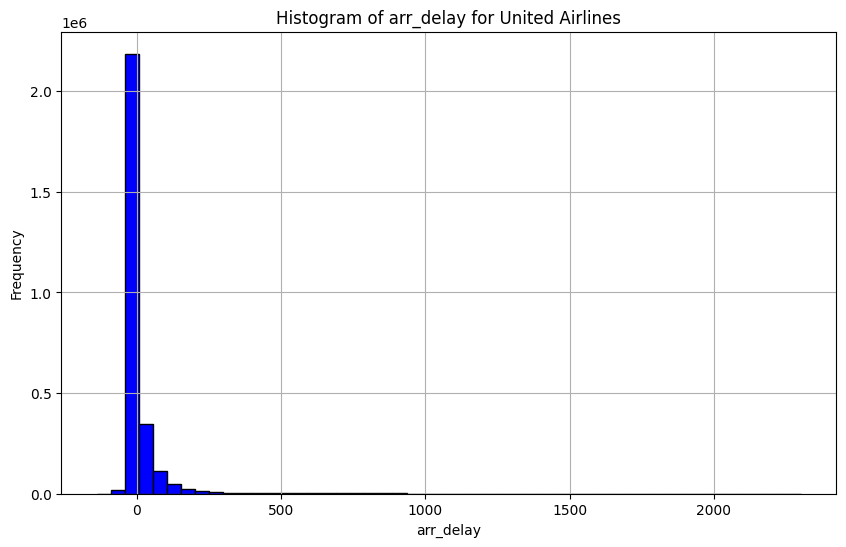

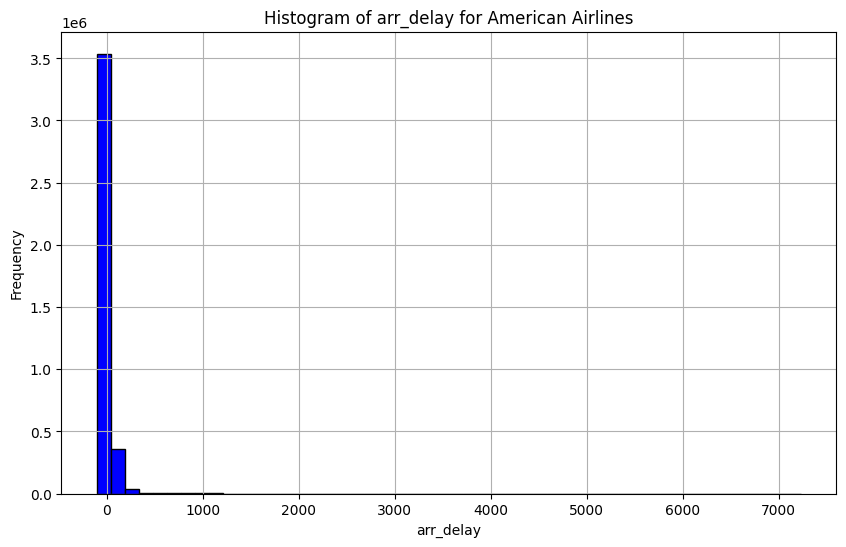

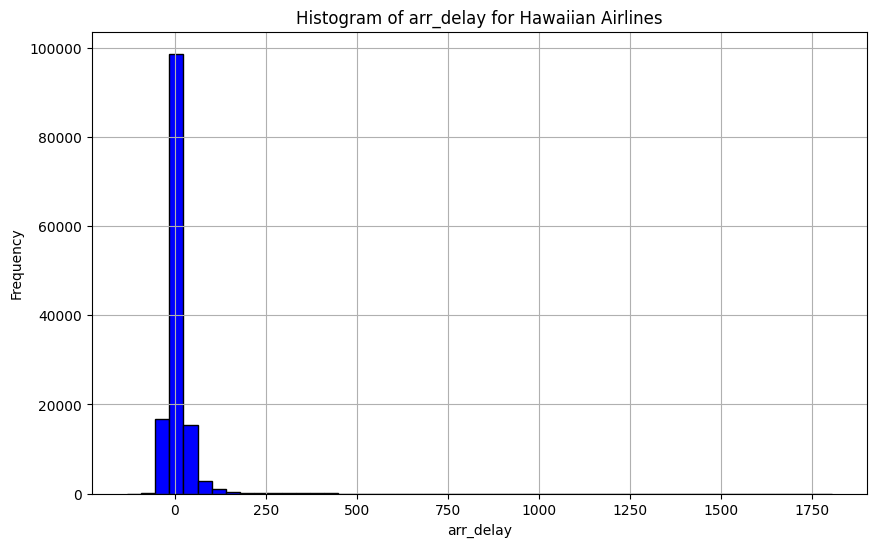

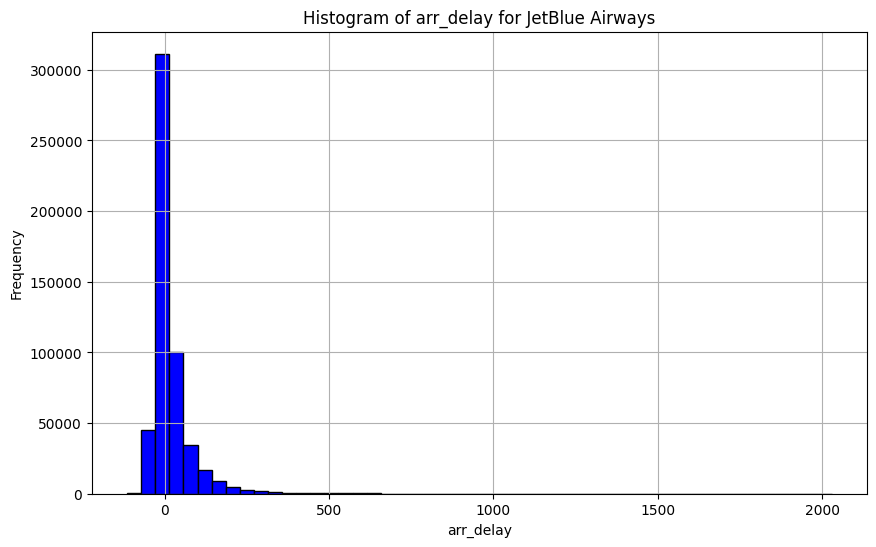

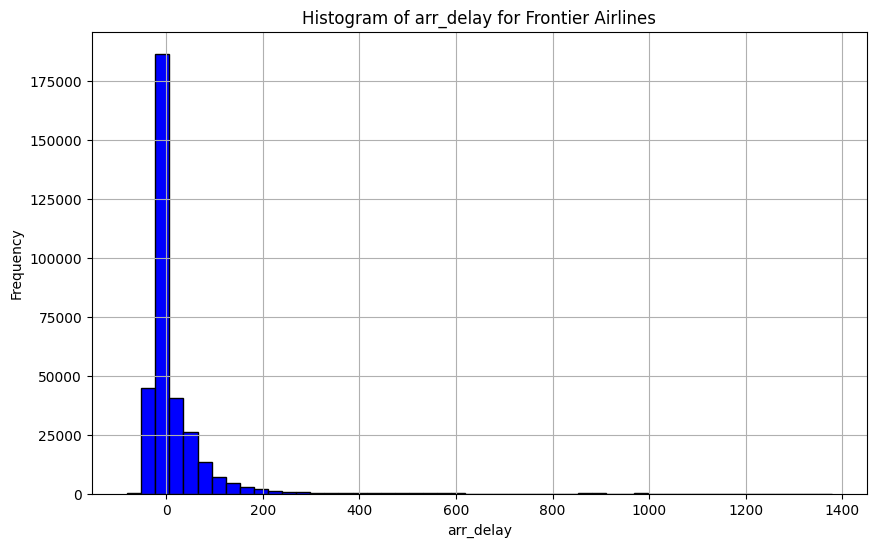

Summary Statistics for United Airlines:
Mean: 3.487178263083582
Variance: 3738.3740740761446
Skewness: 8.878754874055065
Kurtosis: 126.71926232743459

Summary Statistics for American Airlines:
Mean: 3.679904974605719
Variance: 4077.622941607835
Skewness: 12.164784870210989
Kurtosis: 317.12701083426316

Summary Statistics for Hawaiian Airlines:
Mean: 4.091734940469173
Variance: 1816.293403731257
Skewness: 13.850690752357144
Kurtosis: 341.156625553489

Summary Statistics for JetBlue Airways:
Mean: 13.58160402859638
Variance: 4399.039319443853
Skewness: 5.778612635039909
Kurtosis: 69.95990418953694

Summary Statistics for Frontier Airlines:
Mean: 11.012495250960361
Variance: 4120.587182739836
Skewness: 7.169057769626637
Kurtosis: 90.86614815784331



In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

# Function to filter by airline and compute statistics for the delay column
def fit_distribution_and_stats(df, airline_code, delay_column):
    # Filter data by airline
    df_airline = df[df['airline'] == airline_code]

    # Drop NaN values in the delay column
    df_airline = df_airline.dropna(subset=[delay_column])

    # Calculate summary statistics
    mean_val = df_airline[delay_column].mean()
    variance_val = df_airline[delay_column].var()
    skewness_val = stats.skew(df_airline[delay_column])
    kurtosis_val = stats.kurtosis(df_airline[delay_column])

    return mean_val, variance_val, skewness_val, kurtosis_val, df_airline[delay_column]

# Function to plot distribution and display statistics for multiple airlines
def compare_airline_distributions(df, delay_column, airline_list):
    airline_stats = {}

    # Loop through the selected airlines
    for airline_code in airline_list:
        # Get the delay data and statistics for the current airline
        mean_val, variance_val, skewness_val, kurtosis_val, delay_data = fit_distribution_and_stats(df, airline_code, delay_column)

        # Store statistics in the dictionary
        airline_stats[airline_code] = {
            "Mean": mean_val,
            "Variance": variance_val,
            "Skewness": skewness_val,
            "Kurtosis": kurtosis_val
        }

        # Plot histogram for the airline
        plt.figure(figsize=(10, 6))
        plt.hist(delay_data, bins=50, color='blue', edgecolor='black')
        plt.title(f'Histogram of {delay_column} for {airline_code}')
        plt.xlabel(delay_column)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()

    # Print the statistics for all airlines
    for airline_code, stats in airline_stats.items():
        print(f"Summary Statistics for {airline_code}:")
        print(f"Mean: {stats['Mean']}")
        print(f"Variance: {stats['Variance']}")
        print(f"Skewness: {stats['Skewness']}")
        print(f"Kurtosis: {stats['Kurtosis']}")
        print()

# Example usage:
# Select a delay column ('dep_delay' or 'arr_delay') for comparison
delay_column = 'arr_delay'  # For arrival delays

# List of airlines in df1
airline_list = df1['airline'].unique()

# Compare distributions and print statistics for the selected airlines
compare_airline_distributions(df1, delay_column, airline_list)


### Code Explanation (Main Points):
1. **Function Definition (`fit_distribution_and_stats`)**:
   - Filters data for a specific airline.
   - Drops `NaN` values in the delay column.
   - Calculates statistics: mean, variance, skewness, kurtosis for the delay column.

2. **Main Function (`compare_airline_distributions`)**:
   - Loops through the list of selected airlines.
   - Calls the `fit_distribution_and_stats` function for each airline to get statistics.
   - Stores the statistics for each airline in a dictionary.
   - Plots a histogram for the delay data for each airline.

3. **Plotting**:
   - Histograms of the arrival delay distribution for each airline are plotted.
   - The histogram has bins for frequency and shows the distribution of arrival delays.

### Observations from the Histogram:

#### United Airlines:
- **Skewness**: 8.88 (Right-skewed)
  - This indicates the distribution is **positively skewed**, meaning there are some long delays, but most of the delays are on the shorter end.
- **Kurtosis**: 126.72 (Leptokurtic)
  - The **heavy tails** suggest that there are a few extreme delays.
- **Histogram**: Expect a few high peaks but mostly lower values indicating short delays.

#### American Airlines:
- **Skewness**: 12.16 (Right-skewed)
  - The positive skew indicates a **right-skewed distribution**, where most delays are short, but some larger delays are pulling the average up.
- **Kurtosis**: 317.13 (Leptokurtic)
  - The high kurtosis suggests a **heavy tail**, meaning that extreme delays are more frequent compared to a normal distribution.
- **Histogram**: The histogram will have a steep peak with some noticeable long delays tailing off.

#### Hawaiian Airlines:
- **Skewness**: 13.85 (Right-skewed)
  - Again, a **right-skewed** distribution with a tendency for longer delays but still mostly shorter delays.
- **Kurtosis**: 341.16 (Leptokurtic)
  - Extremely high kurtosis indicates **heavy tails**, with more frequent long delays than expected in a normal distribution.
- **Histogram**: A sharply peaked histogram with some long-tail values for extreme delays.

#### JetBlue Airways:
- **Skewness**: 5.78 (Right-skewed)
  - A lower skew than others, but still **right-skewed**, indicating that most delays are short, but some are significantly longer.
- **Kurtosis**: 69.96 (Leptokurtic)
  - The **high kurtosis** suggests some extreme delays in the data, though not as much as Hawaiian Airlines.
- **Histogram**: Similar to the others but with slightly less extreme values compared to Hawaiian Airlines.

#### Frontier Airlines:
- **Skewness**: 7.17 (Right-skewed)
  - **Right-skewed**, meaning there are some long delays but the majority of delays are shorter.
- **Kurtosis**: 90.87 (Leptokurtic)
  - The **heavy tails** show a tendency for extreme delays, but less so than Hawaiian Airlines or American Airlines.
- **Histogram**: The distribution would show a peak for short delays, with some extreme long delays on the right tail.

### Summary Observations from the Graphs:
- All airlines show a **right-skewed** distribution (positive skewness), meaning most delays are short but there are some **long delays**.
- **Leptokurtic distributions** (high kurtosis) suggest that there are **extreme outliers**, or very long delays, more frequently than in a normal distribution.
- **JetBlue Airways** has relatively less extreme delays, while **Hawaiian Airlines** shows the most extreme long delays.


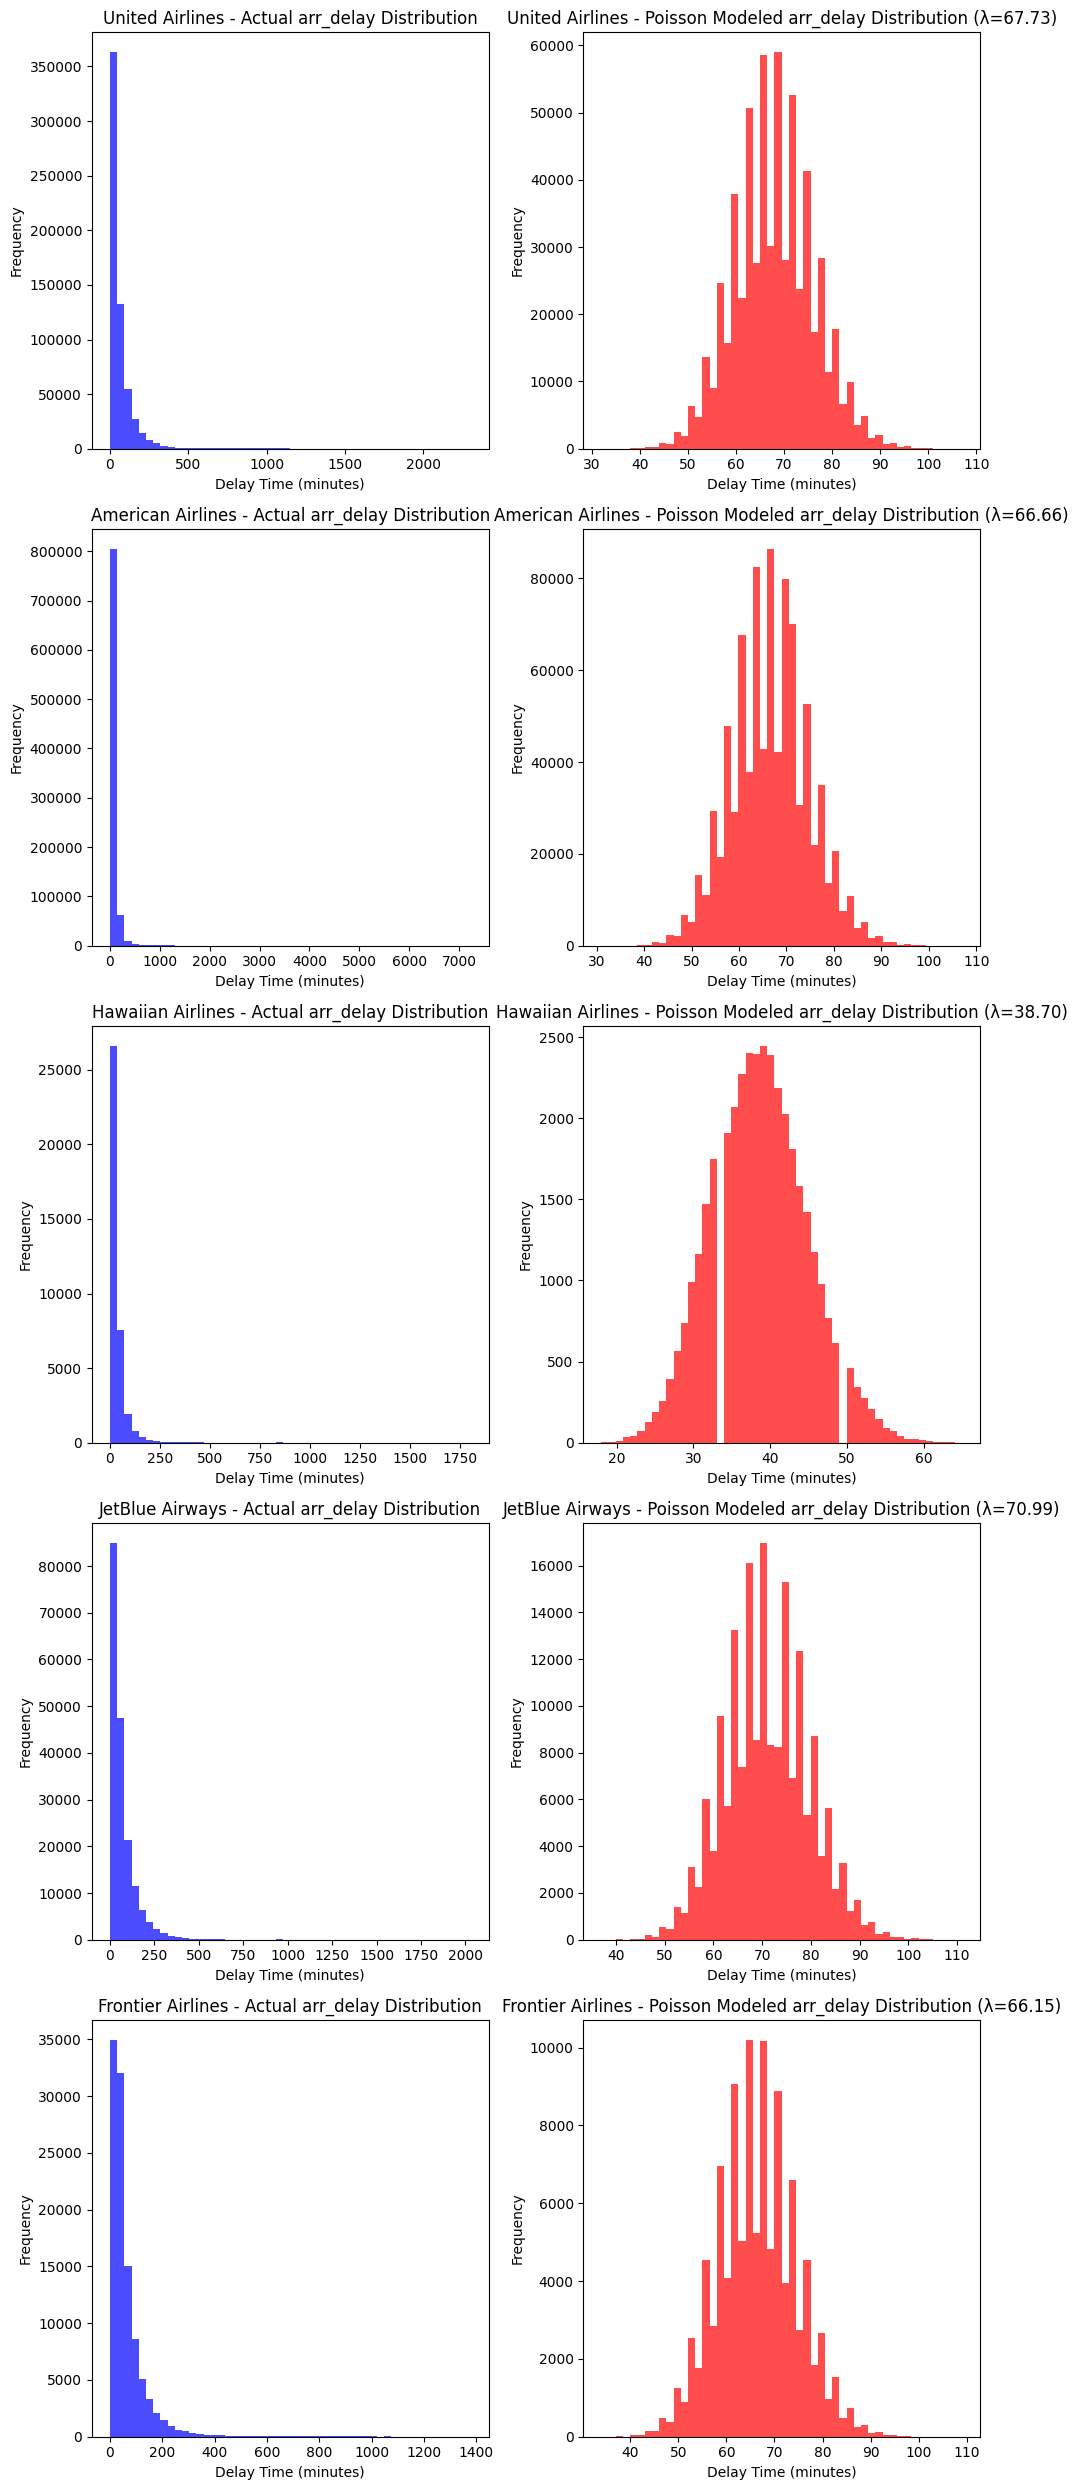

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to fit Poisson distribution
def fit_poisson_distribution(df, airline_code, delay_column):
    # Filter data for the specific airline
    df_airline = df[df['airline'] == airline_code]

    # Remove negative delays (Poisson models counts, so values must be non-negative)
    df_airline = df_airline[df_airline[delay_column] >= 0]

    # Check if there are valid data points
    if df_airline.empty:
        return None, None, None  # Skip airlines with no valid delays

    # Estimate lambda (mean delay)
    lambda_poisson = df_airline[delay_column].mean()

    # Generate Poisson-distributed values based on estimated lambda
    poisson_values = np.random.poisson(lam=lambda_poisson, size=len(df_airline))

    return lambda_poisson, poisson_values, df_airline[delay_column]

# Function to plot normal and Poisson distributions for all airlines
def plot_all_airlines(df, delay_column):
    unique_airlines = df['airline'].unique()  # Get list of airlines

    # Create figure with subplots (2 plots per airline)
    fig, axes = plt.subplots(nrows=len(unique_airlines), ncols=2, figsize=(10, 5 * len(unique_airlines)))

    for idx, airline_code in enumerate(unique_airlines):
        lambda_poisson, poisson_values, actual_delays = fit_poisson_distribution(df, airline_code, delay_column)

        # Skip airlines with invalid data
        if lambda_poisson is None:
            print(f"Skipping {airline_code}: No valid {delay_column} data.")
            continue

        # Plot actual delay distribution
        axes[idx, 0].hist(actual_delays, bins=50, alpha=0.7, color='blue')
        axes[idx, 0].set_title(f"{airline_code} - Actual {delay_column} Distribution")
        axes[idx, 0].set_xlabel("Delay Time (minutes)")
        axes[idx, 0].set_ylabel("Frequency")

        # Plot Poisson-generated delay distribution
        axes[idx, 1].hist(poisson_values, bins=50, alpha=0.7, color='red')
        axes[idx, 1].set_title(f"{airline_code} - Poisson Modeled {delay_column} Distribution (λ={lambda_poisson:.2f})")
        axes[idx, 1].set_xlabel("Delay Time (minutes)")
        axes[idx, 1].set_ylabel("Frequency")

    # Adjust layout for better spacing
    plt.tight_layout()
    plt.show()

# Example Usage:
delay_column = 'arr_delay'  # Change to 'dep_delay' for departure delays

# Run the plot function
plot_all_airlines(df1, delay_column)


# Hypothesis Testing for Airline Data

## 1. Departure Delay Hypothesis
- **H₀ (Null Hypothesis):** The average departure delay (`dep_delay`) is the same across all airlines.  
- **H₁ (Alternative Hypothesis):** At least one airline has a significantly different average departure delay.  

## 2. Arrival Delay and Air Time Relationship
- **H₀:** There is no correlation between air time (`air_time`) and arrival delay (`arr_delay`) across different airlines.  
- **H₁:** There is a significant correlation between air time and arrival delay, varying by airline.  

## 3. Effect of Distance on Delay
- **H₀:** The distance (`dist`) of a flight does not significantly impact departure delay (`dep_delay`) across airlines.  
- **H₁:** Longer distances tend to have higher or lower departure delays, varying by airline.  

## 4. Impact of Carrier Delays on Arrival Delays
- **H₀:** Carrier delays (`carrier_delay`) contribute equally to arrival delay (`arr_delay`) for all airlines.  
- **H₁:** Carrier delays have a significantly different impact on arrival delays for different airlines.  

## 5. Weather Delay Across Airlines
- **H₀:** Weather delays (`weather_delay`) affect all airlines equally.  
- **H₁:** Certain airlines experience more weather delays than others.  
